In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr


In [175]:
amobile = pd.read_csv("file:///C:/Users/Dell/Downloads/imports-85.data",names=['sym','normloss','make','fuel_type','aspiration','no_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','no_cylinders','engine_size','fuel systems','bore','stroke','compression_ratio','horpower','peak_rpm','city_mpg','highway_mpg','price'],na_values='?')
#to change columns names

In [176]:
amobile.head(5)#head

,sym,normloss,make,fuel_type,aspiration,no_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel systems,bore,stroke,compression_ratio,horpower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [177]:
amobile.tail(5)#tail

,sym,normloss,make,fuel_type,aspiration,no_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel systems,bore,stroke,compression_ratio,horpower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [178]:
amobile.shape

(205, 26)

In [179]:
amobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sym                205 non-null    int64  
 1   normloss           164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_doors           203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  no_cylinders       205 non-null    object 
 16  engine_size        205 non

In [180]:
amobile.isnull().sum()

sym                   0
normloss             41
make                  0
fuel_type             0
aspiration            0
no_doors              2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
no_cylinders          0
engine_size           0
fuel systems          0
bore                  4
stroke                4
compression_ratio     0
horpower              2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [181]:
amobile.describe()

,sym,normloss,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horpower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [182]:
amobile.sym.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: sym, dtype: int64

In [183]:
amobile.horpower.mean()

104.25615763546799

{'whiskers': [<matplotlib.lines.Line2D at 0x1a254678c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2546852e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2546788b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a254685a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a254685d90>],
 'means': []}

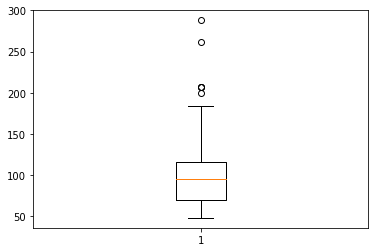

In [184]:
amobile.horpower.fillna(amobile.horpower.median(),inplace=True)
plt.boxplot(amobile.horpower)

In [185]:
amobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sym                205 non-null    int64  
 1   normloss           164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_doors           203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  no_cylinders       205 non-null    object 
 16  engine_size        205 non

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2546dd820>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2546ddf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2546dd520>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2546ea6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2546eaa30>],
 'means': []}

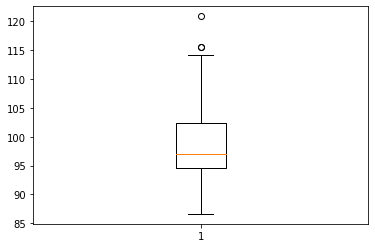

In [186]:
plt.boxplot(amobile.wheel_base)

In [187]:
amobile.peak_rpm.mean()

5125.369458128079

In [188]:
amobile.peak_rpm.fillna("5125",inplace=True)

In [189]:
Q1=amobile.wheel_base.quantile(0.75)
Q3=amobile.wheel_base.quantile(0.25)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q3-1.5*(IQR)

In [190]:
print(UE)

82.64999999999999


In [191]:
print(LE)

106.35000000000001


In [192]:
amobile[(amobile.wheel_base < UE) & (amobile.wheel_base > LE)]

,sym,normloss,make,fuel_type,aspiration,no_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel systems,bore,stroke,compression_ratio,horpower,peak_rpm,city_mpg,highway_mpg,price


In [193]:
amobile.stroke[amobile.stroke>UE] = UE #capping #topping

C:\Users\Dell\AppData\Local\Temp/ipykernel_3844/3325698832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amobile.stroke[amobile.stroke>UE] = UE #capping #topping


In [194]:
amobile.sym.describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: sym, dtype: float64

In [195]:
amobile.sym.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: sym, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sym', ylabel='count'>

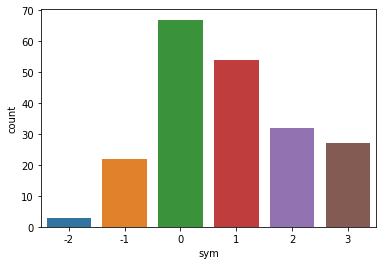

In [196]:
sns.countplot(amobile.sym)

In [197]:
amobile.normloss.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normloss, dtype: float64

In [198]:
amobile.normloss.isnull().sum()

41

In [199]:
amobile.normloss.fillna(amobile.normloss.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2547bf070>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2547bf790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2547aeca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2547bfeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2547c9280>],
 'means': []}

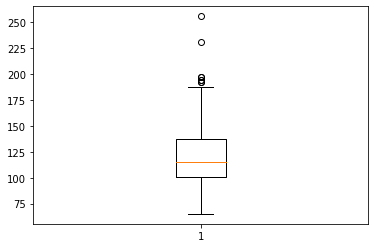

In [200]:
plt.boxplot(amobile.normloss)

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

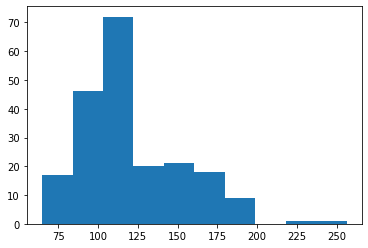

In [201]:
plt.hist(amobile.normloss)

In [202]:
stats.shapiro(amobile.normloss)

ShapiroResult(statistic=0.9371652007102966, pvalue=9.691518698673462e-08)

In [203]:
amobile.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

In [204]:
amobile.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

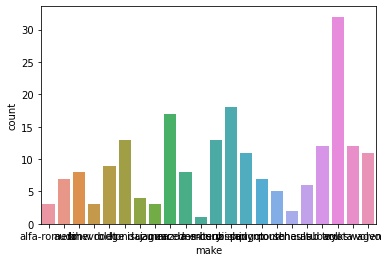

In [205]:
sns.countplot(amobile.make)

In [206]:
plt.figure(figsize=(25,25))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

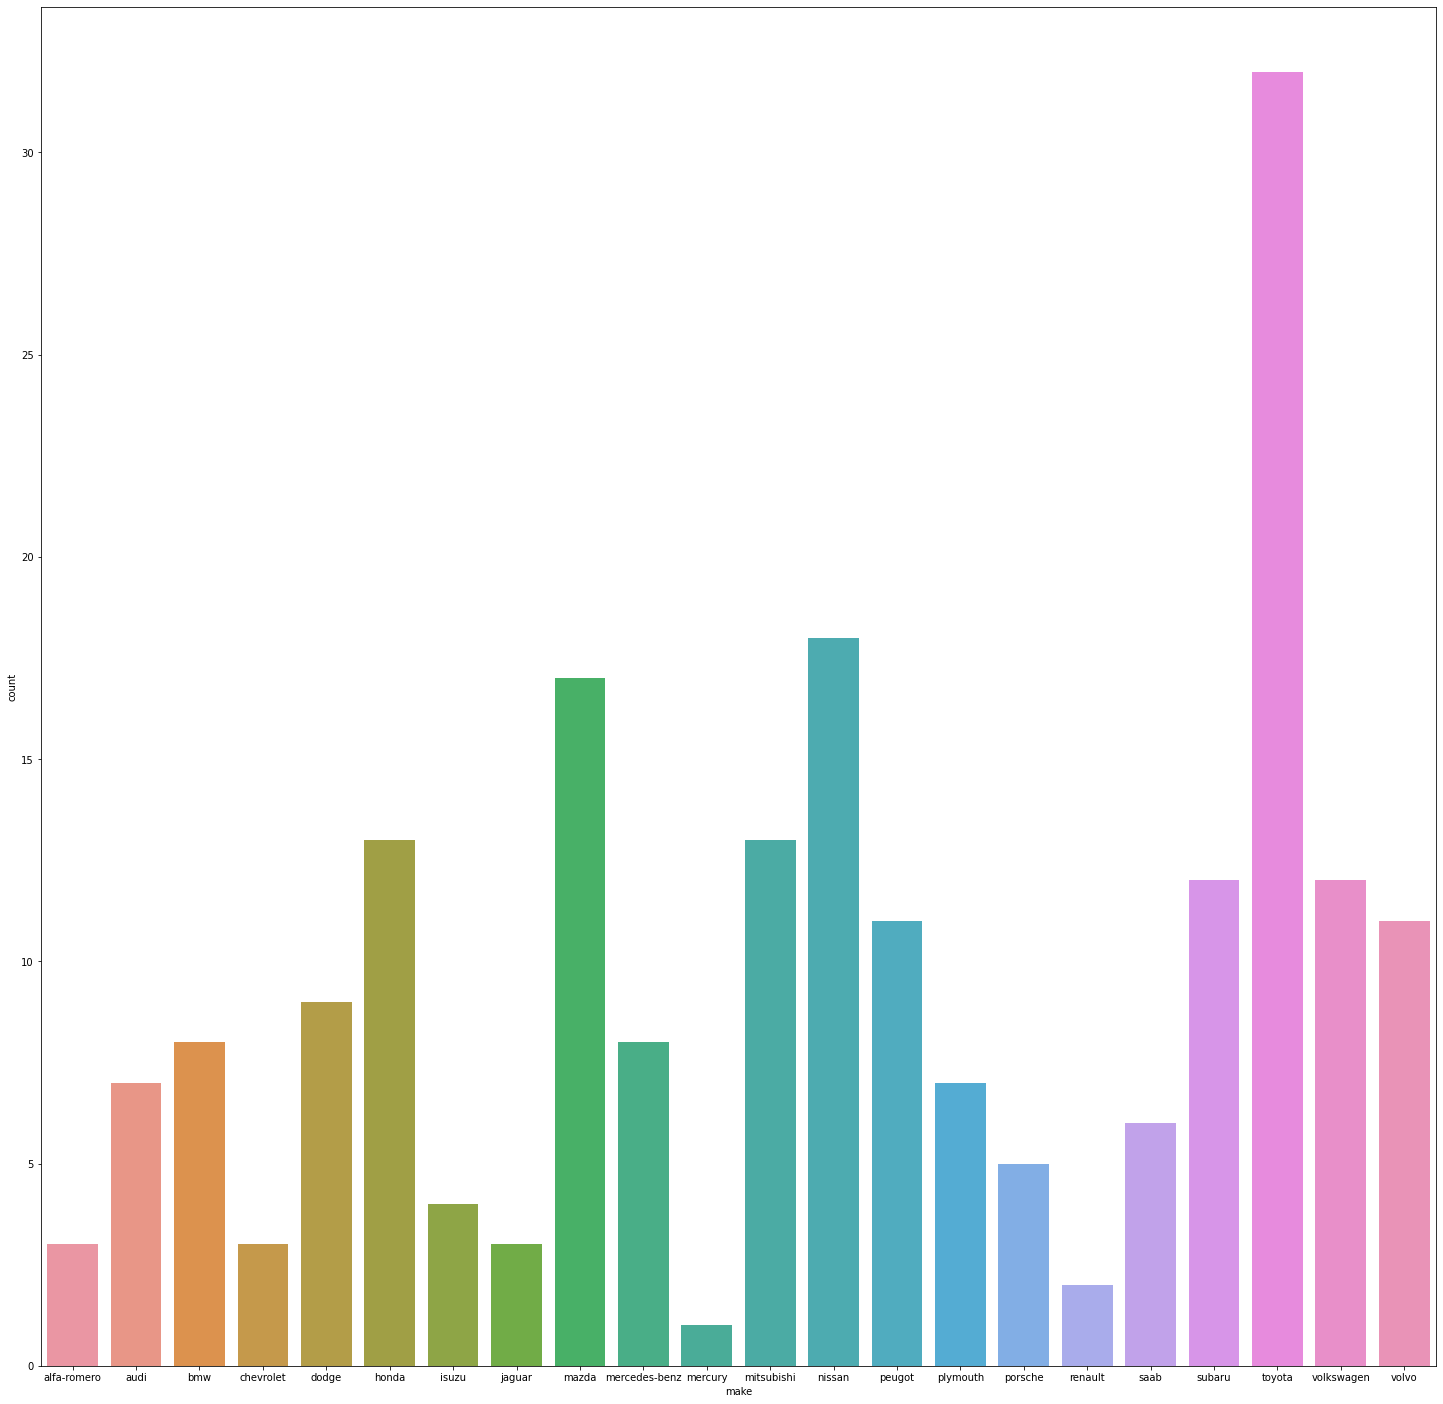

In [207]:
plt.figure(figsize=(25,25))
sns.countplot(amobile.make)

In [208]:
amobile.fuel_type.describe()

count     205
unique      2
top       gas
freq      185
Name: fuel_type, dtype: object

In [209]:
amobile.fuel_type.value_counts()

gas       185
diesel     20
Name: fuel_type, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

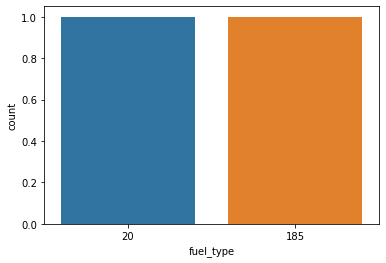

In [210]:
sns.countplot(amobile.fuel_type.value_counts())

In [211]:
amobile.aspiration.describe()

count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object

In [212]:
amobile.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aspiration', ylabel='count'>

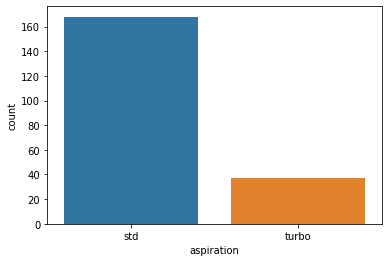

In [213]:
sns.countplot(amobile.aspiration)

In [214]:
amobile.no_doors.describe()

count      203
unique       2
top       four
freq       114
Name: no_doors, dtype: object

In [215]:
amobile.no_doors.isnull().sum()

2

In [216]:
amobile.no_doors.fillna('four',inplace=True)

In [217]:
amobile.no_doors.value_counts()

four    116
two      89
Name: no_doors, dtype: int64

In [218]:
amobile.no_doors.isnull().sum()

0

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_doors', ylabel='count'>

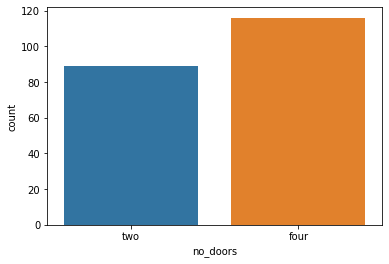

In [219]:
sns.countplot(amobile.no_doors)

In [220]:
amobile.body_style.describe()

count       205
unique        5
top       sedan
freq         96
Name: body_style, dtype: object

In [221]:
amobile.body_style.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_style', ylabel='count'>

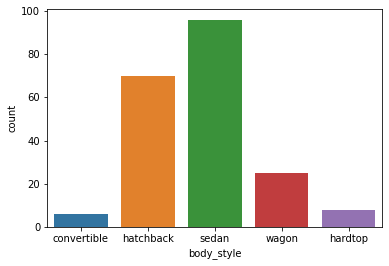

In [222]:
sns.countplot(amobile.body_style)

In [223]:
amobile.drive_wheels.describe()

count     205
unique      3
top       fwd
freq      120
Name: drive_wheels, dtype: object

In [224]:
amobile.drive_wheels.isnull().sum()

0

In [225]:
amobile.drive_wheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drive_wheels', ylabel='count'>

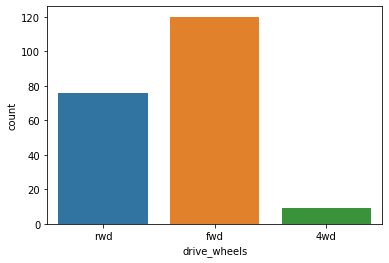

In [226]:
sns.countplot(amobile.drive_wheels)

In [227]:
amobile.engine_location.describe()

count       205
unique        2
top       front
freq        202
Name: engine_location, dtype: object

In [228]:
amobile.engine_location.isnull().sum()

0

In [229]:
amobile.engine_location.value_counts()

front    202
rear       3
Name: engine_location, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_location', ylabel='count'>

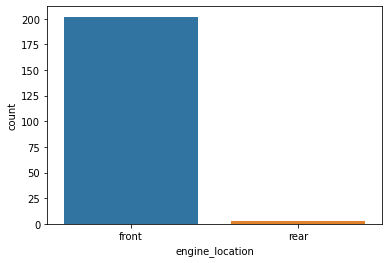

In [230]:
sns.countplot(amobile.engine_location)

In [231]:
amobile.wheel_base.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel_base, dtype: float64

In [232]:
amobile.wheel_base.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a255c19d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1a255c274c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a255c199a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a255c27be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a255c27f70>],
 'means': []}

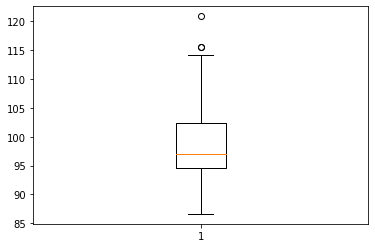

In [233]:
plt.boxplot(amobile.wheel_base)

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <BarContainer object of 10 artists>)

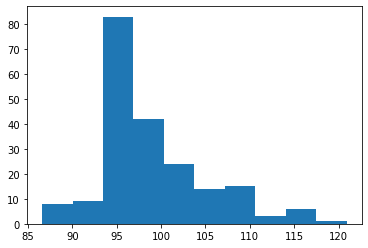

In [234]:
plt.hist(amobile.wheel_base)

In [235]:
stats.shapiro(amobile.wheel_base)

ShapiroResult(statistic=0.9115860462188721, pvalue=1.0368441660801864e-09)

In [236]:
amobile.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

In [237]:
amobile.length.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a255d133a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a255d13ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a255d04fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a255d1d220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a255d1d5b0>],
 'means': []}

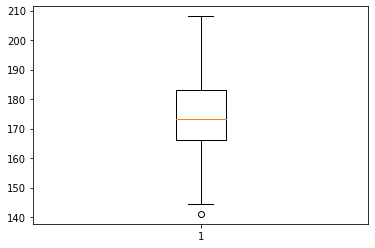

In [238]:
plt.boxplot(amobile.length)

(array([ 3.,  3., 29., 23., 54., 39., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <BarContainer object of 10 artists>)

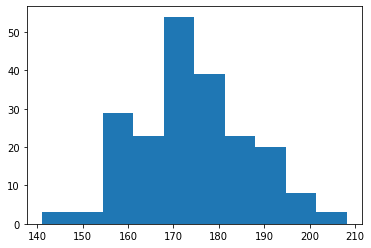

In [239]:
plt.hist(amobile.length)

In [240]:
stats.shapiro(amobile.length)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

In [241]:
amobile.width.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

In [242]:
amobile.width.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a255df5a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a255df5fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a255df5700>],
 'medians': [<matplotlib.lines.Line2D at 0x1a255e02730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a255e02ac0>],
 'means': []}

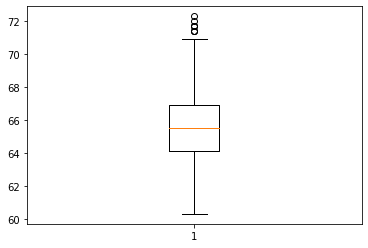

In [243]:
plt.boxplot(amobile.width)

(array([ 1.,  2., 36., 39., 44., 42., 20.,  7.,  6.,  8.]),
 array([60.3, 61.5, 62.7, 63.9, 65.1, 66.3, 67.5, 68.7, 69.9, 71.1, 72.3]),
 <BarContainer object of 10 artists>)

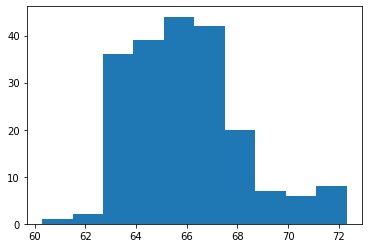

In [244]:
plt.hist(amobile.width)

In [245]:
stats.shapiro(amobile.width)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

In [246]:
amobile.height.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

In [247]:
amobile.height.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a255ed4c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a255ee12e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a255ed48e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a255ee19d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a255ee1d60>],
 'means': []}

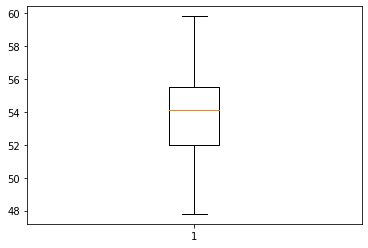

In [248]:
plt.boxplot(amobile.height)

(array([ 3.,  9., 28., 25., 33., 41., 38., 15.,  4.,  9.]),
 array([47.8, 49. , 50.2, 51.4, 52.6, 53.8, 55. , 56.2, 57.4, 58.6, 59.8]),
 <BarContainer object of 10 artists>)

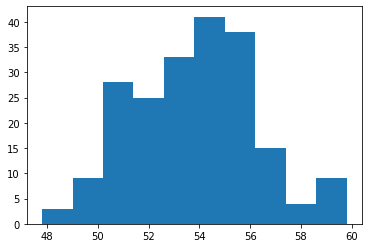

In [249]:
plt.hist(amobile.height)

In [250]:
stats.shapiro(amobile.height)

ShapiroResult(statistic=0.9842321276664734, pvalue=0.021682262420654297)

In [251]:
amobile.curb_weight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb_weight, dtype: float64

In [252]:
amobile.curb_weight.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a255fac550>,
 'caps': [<matplotlib.lines.Line2D at 0x1a255facc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a255fac1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a255fb53d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a255fb56a0>],
 'means': []}

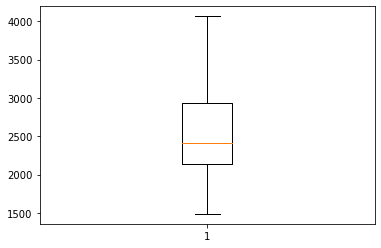

In [253]:
plt.boxplot(amobile.curb_weight)

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

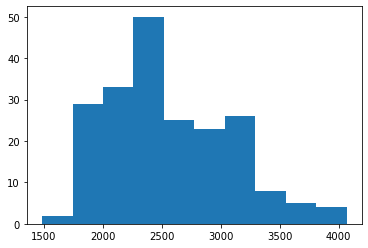

In [254]:
plt.hist(amobile.curb_weight)

In [255]:
stats.shapiro(amobile.curb_weight)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

In [256]:
amobile.engine_type.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [257]:
amobile.engine_type.isnull().sum()

0

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_type', ylabel='count'>

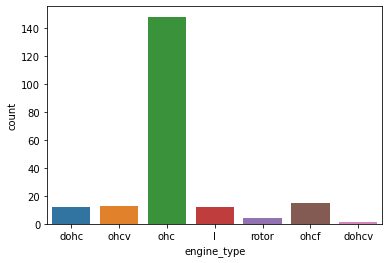

In [258]:
sns.countplot(amobile.engine_type)

In [259]:
amobile.no_cylinders.describe()

count      205
unique       7
top       four
freq       159
Name: no_cylinders, dtype: object

In [260]:
amobile.no_cylinders.isnull().sum()

0

In [261]:
amobile.no_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: no_cylinders, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_cylinders', ylabel='count'>

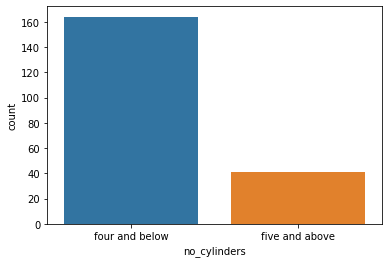

In [262]:
amobile.no_cylinders=amobile.no_cylinders.replace(['three','two','four'],"four and below")
amobile.no_cylinders=amobile.no_cylinders.replace(['six','five','eight','twelve'],"five and above")
sns.countplot(amobile.no_cylinders)

In [263]:
amobile.engine_size.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine_size, dtype: float64

In [264]:
amobile.engine_size.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2561505e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a256150d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a256150250>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25615c460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25615c7f0>],
 'means': []}

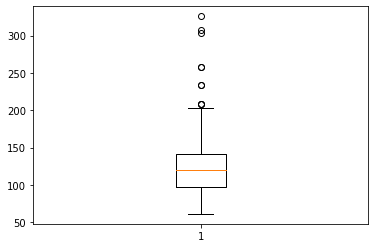

In [265]:
plt.boxplot(amobile.engine_size)

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

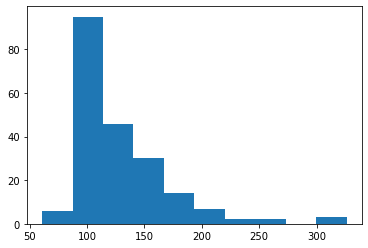

In [266]:
plt.hist(amobile.engine_size)

In [267]:
stats.shapiro(amobile.engine_size)

ShapiroResult(statistic=0.8294388651847839, pvalue=3.0569154792128156e-14)

In [268]:
amobile.fuel_type.describe()

count     205
unique      2
top       gas
freq      185
Name: fuel_type, dtype: object

In [269]:
amobile.fuel_type.isnull().sum()

0

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

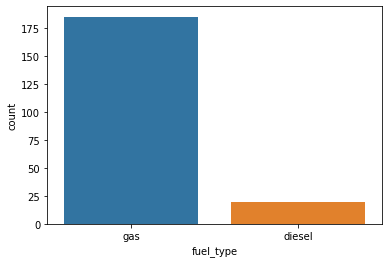

In [270]:
sns.countplot(x="fuel_type",data=amobile)

In [271]:
amobile.bore.describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [272]:
amobile.bore.isnull().sum()

4

{'whiskers': [<matplotlib.lines.Line2D at 0x1a256283a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25628f1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a256283700>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25628f910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25628fca0>],
 'means': []}

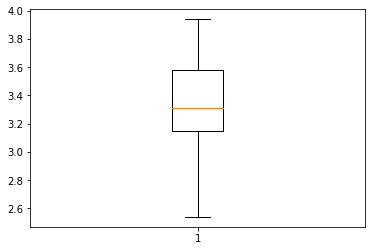

In [273]:
amobile.bore.fillna(amobile.bore.mean(),inplace=True)
plt.boxplot(amobile.bore)

(array([ 1.,  1.,  8., 37., 40., 28., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

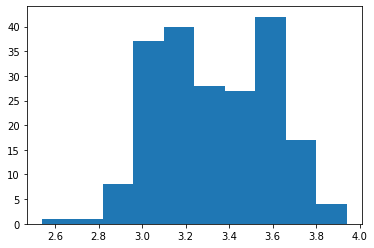

In [274]:
plt.hist(amobile.bore)

In [275]:
stats.shapiro(amobile.bore)

ShapiroResult(statistic=0.967185378074646, pvalue=0.00010421191109344363)

In [276]:
amobile.stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [277]:
amobile.stroke.isnull().sum()

4

{'whiskers': [<matplotlib.lines.Line2D at 0x1a25637c370>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25637c8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25636efa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25637cfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25638a3a0>],
 'means': []}

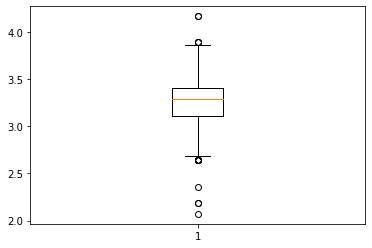

In [278]:
amobile.stroke.fillna(amobile.stroke.median(),inplace=True)
plt.boxplot(amobile.stroke)

In [279]:
q3=amobile.stroke.quantile(0.75)
q1=amobile.stroke.quantile(0.25)

In [280]:
iqr=q3-q1

In [281]:
UE=q3+1.5*(iqr)
LE=q1-1.5*(iqr)

In [282]:
amobile[(amobile.stroke<UE)&(amobile.stroke>LE)]

,sym,normloss,make,fuel_type,aspiration,no_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel systems,bore,stroke,compression_ratio,horpower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [283]:
amobile.stroke[amobile.stroke>UE]=UE

C:\Users\Dell\AppData\Local\Temp/ipykernel_3844/1214189095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amobile.stroke[amobile.stroke>UE]=UE


In [284]:
amobile.stroke[amobile.stroke<LE]=LE

C:\Users\Dell\AppData\Local\Temp/ipykernel_3844/3083984406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amobile.stroke[amobile.stroke<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x1a2563e2400>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2563e2b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2563e2070>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2563ee280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2563ee610>],
 'means': []}

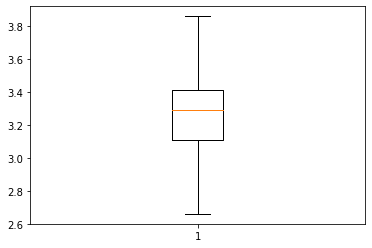

In [285]:
plt.boxplot(amobile.stroke)

(array([18.,  3.,  3., 31., 36., 28., 51., 21.,  5.,  9.]),
 array([2.66, 2.78, 2.9 , 3.02, 3.14, 3.26, 3.38, 3.5 , 3.62, 3.74, 3.86]),
 <BarContainer object of 10 artists>)

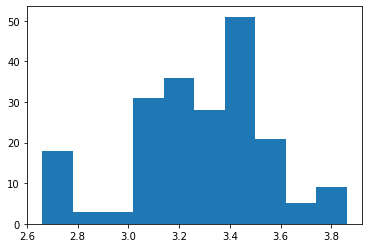

In [286]:
plt.hist(amobile.stroke)

In [287]:
stats.shapiro(amobile.stroke)

ShapiroResult(statistic=0.9504072666168213, pvalue=1.5814290463822545e-06)

In [288]:
amobile.compression_ratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression_ratio, dtype: float64

In [289]:
amobile.compression_ratio.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2564bf370>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2564bf9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2564affa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2564cc0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2564cc490>],
 'means': []}

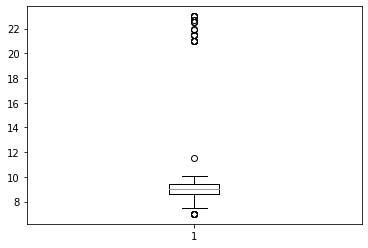

In [290]:
plt.boxplot(amobile.compression_ratio)

(array([ 51., 133.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,  15.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <BarContainer object of 10 artists>)

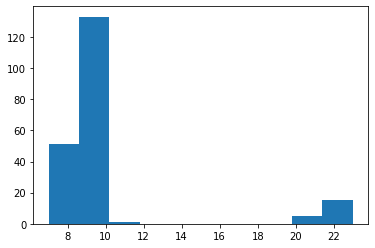

In [291]:
plt.hist(amobile.compression_ratio)

In [292]:
stats.shapiro(amobile.compression_ratio)

ShapiroResult(statistic=0.49774158000946045, pvalue=8.12114079238121e-24)

In [293]:
amobile.peak_rpm.describe()

count      205.0
unique      24.0
top       5500.0
freq        37.0
Name: peak_rpm, dtype: float64

In [294]:
amobile.peak_rpm.describe()

count      205.0
unique      24.0
top       5500.0
freq        37.0
Name: peak_rpm, dtype: float64

In [295]:
amobile.peak_rpm.isnull().sum()

0

TypeError: unsupported operand type(s) for +: 'float' and 'str'

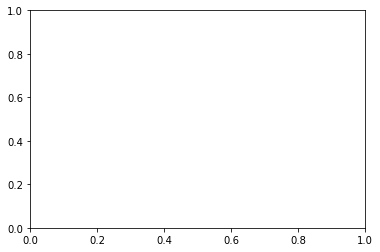

In [296]:
plt.boxplot(amobile.peak_rpm)

TypeError: '<=' not supported between instances of 'float' and 'str'

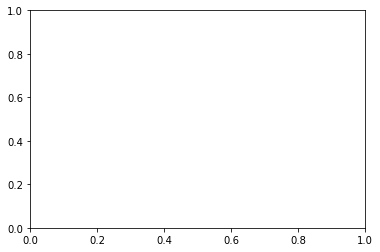

In [297]:
plt.hist(amobile.peak_rpm)

In [298]:
stats.shapiro(amobile.peak_rpm)

TypeError: '<' not supported between instances of 'float' and 'str'

In [299]:
amobile.city_mpg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city_mpg, dtype: float64

In [300]:
amobile.city_mpg.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a257e4bdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a257e58550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a257e4ba60>],
 'medians': [<matplotlib.lines.Line2D at 0x1a257e58c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a257e64190>],
 'means': []}

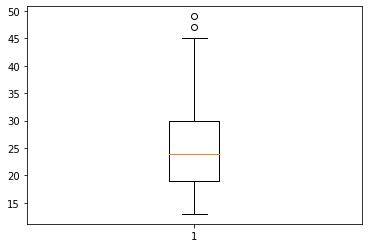

In [301]:
plt.boxplot(amobile.city_mpg)

(array([12., 46., 24., 56., 18., 31., 15.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <BarContainer object of 10 artists>)

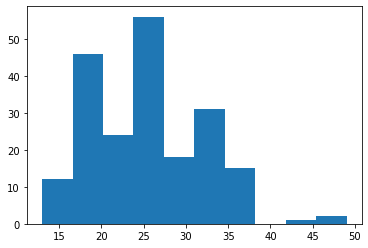

In [302]:
plt.hist(amobile.city_mpg)

In [303]:
stats.shapiro(amobile.city_mpg)

ShapiroResult(statistic=0.9572238922119141, pvalue=7.825866305211093e-06)

In [304]:
amobile.highway_mpg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway_mpg, dtype: float64

In [305]:
amobile.highway_mpg.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a257f400a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a257f407c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a257f31cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a257f40ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a257f4b2b0>],
 'means': []}

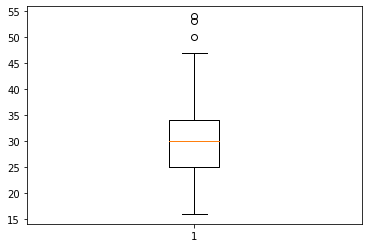

In [306]:
plt.boxplot(amobile.highway_mpg)

(array([ 7., 17., 44., 47., 39., 32.,  8.,  6.,  3.,  2.]),
 array([16. , 19.8, 23.6, 27.4, 31.2, 35. , 38.8, 42.6, 46.4, 50.2, 54. ]),
 <BarContainer object of 10 artists>)

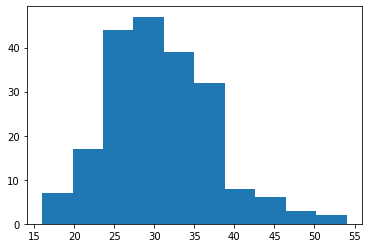

In [307]:
plt.hist(amobile.highway_mpg)

In [308]:
stats.shapiro(amobile.highway_mpg)

ShapiroResult(statistic=0.9735103845596313, pvalue=0.0006515368004329503)

In [309]:
amobile.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [310]:
amobile.price.isnull().sum()

4

In [311]:
amobile.price.fillna(amobile.price.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a25801fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2580301f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25801f700>],
 'medians': [<matplotlib.lines.Line2D at 0x1a258030910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a258030ca0>],
 'means': []}

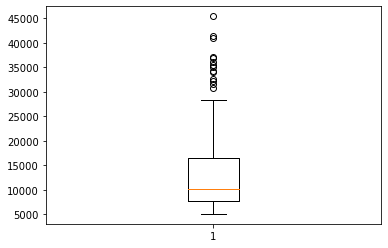

In [312]:
plt.boxplot(amobile.price)

(array([81., 49., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

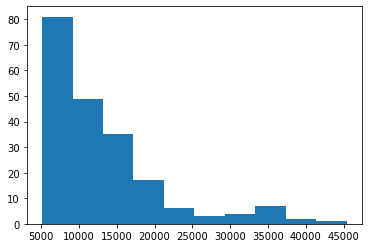

In [313]:
plt.hist(amobile.price)

In [314]:
stats.shapiro(amobile.price)

ShapiroResult(statistic=0.7954238057136536, pvalue=1.144922258705021e-15)

In [315]:
pearsonr(amobile.normloss,amobile.price)

(0.09548893712250724, 0.17321440617487469)

In [316]:
pearsonr(amobile.wheel_base,amobile.price)

(0.584846838972225, 3.338017082369928e-20)

In [317]:
pearsonr(amobile.length,amobile.price)

(0.6865674442855647, 6.428844007376483e-30)

In [318]:
pearsonr(amobile.width,amobile.price)

(0.7245583242779026, 1.1789696449955338e-34)

In [319]:
pearsonr(amobile.height,amobile.price)

(0.1404388185142756, 0.044595778160436715)

In [320]:
pearsonr(amobile.curb_weight,amobile.price)

(0.819816683995632, 4.794551240414322e-51)

In [321]:
pearsonr(amobile.engine_size,amobile.price)

(0.8603427324326135, 2.5111938680510033e-61)

In [322]:
pearsonr(amobile.bore,amobile.price)

(0.5328649013633638, 1.9629473253558344e-16)

In [323]:
pearsonr(amobile.stroke,amobile.price)

(0.06775210629806507, 0.33442437359232785)

In [324]:
pearsonr(amobile.compression_ratio,amobile.price)

(0.07289043869078718, 0.2989754575667938)

In [325]:
pearsonr(amobile.horpower,amobile.price)

(0.7499191229023525, 2.7701494645429105e-38)

In [326]:
pearsonr(amobile.peak_rpm,amobile.price)

(-0.10660006011062678, 0.12818814043070012)

In [327]:
pearsonr(amobile.city_mpg,amobile.price)

(-0.6688215192284404, 6.034974884198224e-28)

In [328]:
pearsonr(amobile.highway_mpg,amobile.price)

(-0.6930373012364786, 1.1310420947833799e-30)

In [334]:
cont_amobile=amobile.drop(['sym','make','fuel_type','aspiration','no_doors','body_style','drive_wheels','engine_location','width','curb_weight','engine_type','no_cylinders','engine_size','fuel systems','horpower','price'],axis=1)



In [335]:
x=cont_amobile.drop(['normloss','wheel_base','length','height','bore','stroke','compression_ratio','peak_rpm','city_mpg','highway_mpg'],axis=1)

In [336]:
y=amobile["price"]

In [337]:
train=x.iloc[:164]
train.shape

(164, 0)

In [338]:
test=x.iloc[164:]
test.shape

(41, 0)

In [339]:
train_x=x
train_y=y
train_xc=sm.add_constant(train_x)
model=sm.OLS(train_y,train_xc).fit()
model.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                nan
Time:                        22:54:03   Log-Likelihood:                -2129.6
No. Observations:                 205   AIC:                             4261.
Df Residuals:                     204   BIC:                             4265.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.315e+04    550.302     23.897      0.000    1.21e+04    1.42e+04
==============================================================================
Omnibus:                       81.823   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.105
Skew:                           1.827   Prob(JB):                     2.90e-45
Kurtosis:                       6.264   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""